Применить методы кластеризации для данных из лабораторной работы №2. Определить каким-либо адекватным способом потенциальное количество кластеров. Создать модель на базе K-Means. Различными способами (на цифрах/визуально) отобразить полученные кластеры, объяснить их род, как было проведено разбиение, какие зависимости были определены и так далее.

Часть из 2 лабы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = pd.read_csv('rd.csv')
print(data.info())
print(f"Количество дубликатов: {data.duplicated().sum()} ")
data.head()
columns_to_remove = ['Unnamed: 0']
data = data.drop(columns=columns_to_remove)
data['file_content'] = data['file_content'].fillna('')
df = data.copy()
data.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23176 entries, 0 to 23175
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       23176 non-null  int64  
 1   language         23176 non-null  object 
 2   file_name        23176 non-null  object 
 3   file_extension   23176 non-null  object 
 4   file_content     23166 non-null  object 
 5   keywords         23130 non-null  object 
 6   symbols          23062 non-null  object 
 7   line_count       23166 non-null  float64
 8   character_count  23166 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.6+ MB
None
Количество дубликатов: 0 


,language,file_name,file_extension,file_content,keywords,symbols,line_count,character_count
0,Ada,100-doors-1.ada,.ada,with Ada.Text_Io; use Ada.Text_Io;\n\n procedu...,loop,_,23.0,656.0
1,Ada,100-doors-2.ada,.ada,with Ada.Text_Io; use Ada.Text_Io;\n with Ada....,num,;,17.0,425.0
2,Ada,24-game.ada,.ada,with Ada.Text_IO;\nwith Ada.Numerics.Discrete_...,i,_,84.0,2927.0


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

df['file_content'] = df['file_content'].fillna('')
feature = df.drop('language', axis=1)
target = df['language']

columns_to_remove = ['file_name', 'file_extension']
feature = df.drop(columns=columns_to_remove)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
feature = tfidf_vectorizer.fit_transform(feature['file_content'])
# print(feature.toarray())

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
# logr = LogisticRegression(max_iter=1000, random_state=42)
# logr.fit(x_train, y_train)
# y_pred = logr.predict(x_test)
# print('\nLogisticRegression:\n')
# print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
# print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
# print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
# print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.4f}')

# dtc = DecisionTreeClassifier(random_state=42)
# dtc.fit(x_train, y_train)
# y_pred = dtc.predict(x_test)
# print('\nDecisionTreeClassifier:\n')
# print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
# print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
# print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
# print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.4f}')

# rfc = RandomForestClassifier(random_state=42)
# rfc.fit(x_train, y_train)
# y_pred = rfc.predict(x_test)
# print('\nRandomForestClassifier:\n')
# print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
# print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
# print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
# print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.4f}')

K-means

Количество кластеров: 20
Средний коэффициент силуэта: 0.0180
Количество кластеров: 21
Средний коэффициент силуэта: 0.0198
Количество кластеров: 22
Средний коэффициент силуэта: 0.0201
Количество кластеров: 23
Средний коэффициент силуэта: 0.0140
Количество кластеров: 24
Средний коэффициент силуэта: 0.0213
Количество кластеров: 25
Средний коэффициент силуэта: 0.0219
Количество кластеров: 26
Средний коэффициент силуэта: 0.0227
Количество кластеров: 27
Средний коэффициент силуэта: 0.0243
Количество кластеров: 28
Средний коэффициент силуэта: 0.0231
Количество кластеров: 29
Средний коэффициент силуэта: 0.0226
Количество кластеров: 30
Средний коэффициент силуэта: 0.0125


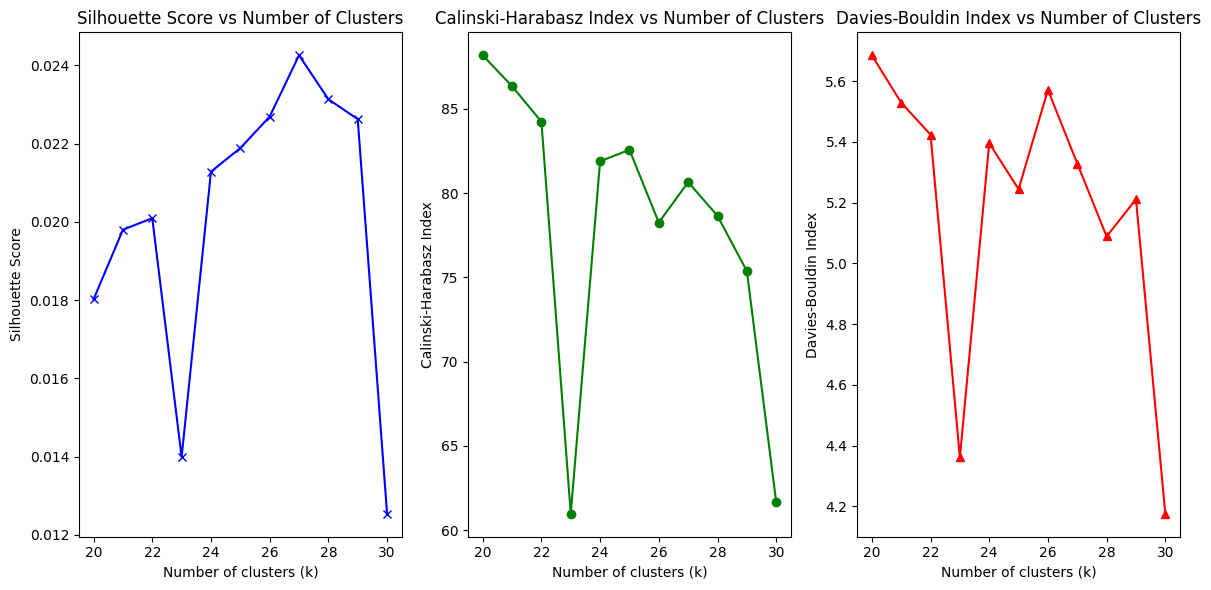

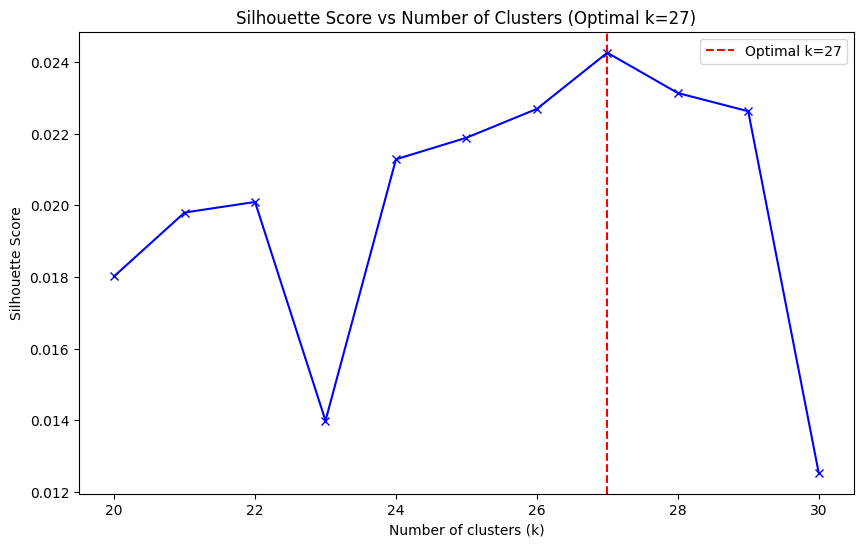

In [3]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

silhouette_scores = []
calinski_harabasz = []
davies_bouldin = []
K = range(20, 31, 1)
dense_feature = feature.toarray()
for k in K:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(feature)

    silhouette_avg = silhouette_score(feature, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    calinski_harabasz_avg = calinski_harabasz_score(dense_feature, cluster_labels)
    calinski_harabasz.append(calinski_harabasz_avg)

    davies_bouldin_avg = davies_bouldin_score(dense_feature, cluster_labels)
    davies_bouldin.append(davies_bouldin_avg)

    print(f"Количество кластеров: {k}")
    print(f"Средний коэффициент силуэта: {silhouette_avg:.4f}")

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

plt.subplot(132)
plt.plot(K, calinski_harabasz, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs Number of Clusters')

plt.subplot(133)
plt.plot(K, davies_bouldin, 'r^-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')

plt.tight_layout()
plt.show()

optimal_k = K[silhouette_scores.index(max(silhouette_scores))]


plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title(f'Silhouette Score vs Number of Clusters (Optimal k={optimal_k})')
plt.legend()
plt.show()


In [4]:
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(feature)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(feature)

def cluster_stats(clusters):
    stats = {}
    for i in range(optimal_k):
        cluster = clusters[cluster_labels == i]
        stats[f"Cluster_{i}"] = {
            "mean": np.mean(cluster, axis=0),
            "median": np.median(cluster, axis=0),
            "min": np.min(cluster, axis=0),
            "max": np.max(cluster, axis=0),
            "std": np.std(cluster, axis=0)
        }
    return stats

stats = cluster_stats(reduced_data)
for cluster_name, info in stats.items():
    print(f"{cluster_name}:")
    for metric, value in info.items():
        print(f"  {metric}: {value}")
    print()

# for i in range(optimal_k):
#     cluster_values = reduced_data[cluster_labels == i]
#     print(f"Распределение значений в кластере {i}:")
#     print(np.histogram(cluster_values[:, 0], bins=50))
#     print(np.histogram(cluster_values[:, 1], bins=50))
#     print()


Cluster_0:
  mean: [ 0.06464849 -0.05346422]
  median: [ 0.049999   -0.05162613]
  min: [-0.04294152 -0.21913231]
  max: [0.37469425 0.0800364 ]
  std: [0.05805277 0.04855103]

Cluster_1:
  mean: [0.27767997 0.13107298]
  median: [0.26198261 0.12080164]
  min: [0.0453277  0.00346836]
  max: [0.60805134 0.38016742]
  std: [0.09623547 0.06886583]

Cluster_2:
  mean: [-0.00644625 -0.01326654]
  median: [-0.02803227 -0.02260966]
  min: [-0.12488034 -0.10632134]
  max: [0.35931741 0.17218281]
  std: [0.07449185 0.05372328]

Cluster_3:
  mean: [-0.02398844 -0.03380148]
  median: [-0.03069527 -0.04705885]
  min: [-0.12171787 -0.1455907 ]
  max: [0.20828051 0.17254184]
  std: [0.04141872 0.03780714]

Cluster_4:
  mean: [-0.02441418 -0.02843211]
  median: [-0.02982463 -0.03731264]
  min: [-0.10843842 -0.11563851]
  max: [0.17150778 0.16995003]
  std: [0.03191891 0.03225653]

Cluster_5:
  mean: [ 0.00845974 -0.03867597]
  median: [-0.00783907 -0.04616383]
  min: [-0.09437582 -0.11165857]
  max: 

Взяли метрики кластеров с помощью Numpy, а именно:

*  Среднее значение
*  Медиана
*   Минимальное значение
*   Максимальное значение
*   Стандартное отклонение


Распределение значений внутри кластеров довольно широкое, что говорит о некоторой неоднородности данных.

Кластеры с высокой вариативностью (например, Cluster_13 и Cluster_14) могут содержать объекты с разнообразными характеристиками.

In [5]:
import plotly.express as px
fig = px.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], color=cluster_labels,labels={'x': 'PCA1', 'y': 'PCA2', 'color': 'Cluster'})
fig.show()

Попытка уйти в график, но снова не получилось, не бейте)

In [6]:
from collections import Counter
def analyze_word_frequencies(cluster_indices, data, tfidf_vectorizer):
    cluster_data = data.iloc[cluster_indices]
    text = ' '.join(cluster_data['file_content'])
    words = text.split()
    word_counts = Counter(words).most_common(5)
    print(f"Top 5 frequent words/n-grams: {word_counts}")

for i in range(optimal_k):
    cluster_indices = np.where(cluster_labels == i)[0]
    print(f"\nCluster {i}:")
    analyze_word_frequencies(cluster_indices, data, tfidf_vectorizer)


Cluster 0:
Top 5 frequent words/n-grams: [('{', 4918), ('}', 4914), (':=', 3432), ('=', 2077), ('//', 1875)]

Cluster 1:
Top 5 frequent words/n-grams: [('<<', 2436), ('{', 2050), ('}', 1872), ('=', 1848), ('#include', 1174)]

Cluster 2:
Top 5 frequent words/n-grams: [('=', 852), ('{', 338), ('}', 324), ('+', 267), ('year', 218)]

Cluster 3:
Top 5 frequent words/n-grams: [('=', 1245), ('{', 570), ('}', 511), ('1', 444), ('+', 437)]

Cluster 4:
Top 5 frequent words/n-grams: [('=', 22433), ('{', 9687), ('}', 9446), ('+', 5620), ('->', 4910)]

Cluster 5:
Top 5 frequent words/n-grams: [('=', 3896), ('->', 1694), ('$', 1248), ('::', 1210), ('import', 1170)]

Cluster 6:
Top 5 frequent words/n-grams: [('=', 8237), ('val', 4726), ('{', 4618), ('}', 4510), ('+', 1645)]

Cluster 7:
Top 5 frequent words/n-grams: [('=', 724), ('}', 500), ('{', 411), ('long', 324), ('return', 210)]

Cluster 8:
Top 5 frequent words/n-grams: [('=', 424), ('}', 277), ('{', 265), ('//', 209), ('#', 182)]

Cluster 9:
To

Анализ всего этого:

**Общие закономерности**



*   Есть четкие различия в распределении n-грамм между разными кластерами. Это говорит о том, что образцы кода принадлежат разным категориям или стилям программирования.

*   Некоторые кластеры показывают более высокие счета для определенных ключевых слов или символов по сравнению с другими, что указывает на различия в стиле кодирования или использовании языков между группами.


**Ключевые наблюдения**


*   Кластеры 4 и 6 имеют очень высокие счета для символа '=', что говорит о большом количестве операций присваивания.
*   Кластеры 1 и 2 имеют относительно высокое количество '<<', что указывает на использование операторов побитового сдвига.


*   Кластеры 9 и 10 имеют высокое количество 'end' и ':=', что говорит о частом использовании операций присваивания ближе к концу циклов.
*   Кластер 12 имеет очень высокое количество 'the', что может указывать на более подробные описания кода или комментарии.
*   Некоторые кластеры (например, 15) показывают более высокие счета для имен переменных ('my', 'sub').
*   Кластеры 18 и 19 имеют высокое количество 'let' и 'def', что указывает на PYTHON или JS.
*   Кластеры 21 и 25 имеют низкие общее счета, что может говорить о более коротких или менее сложных образцах кода.

**Выводы**

Этот анализ может помочь выявить различия между языками программирования.
В целом, этот анализ n-грамм предоставляет уникальный взгляд на структуру и характеристики различного кода, подчеркивая как общие черты в практиках программирования, так и существенные различия между различными стилями или языковыми особенностями.

Да-да, нельзя забывать, что у программистов разных стиль написания кода, который тоже влияет на кластеризацию

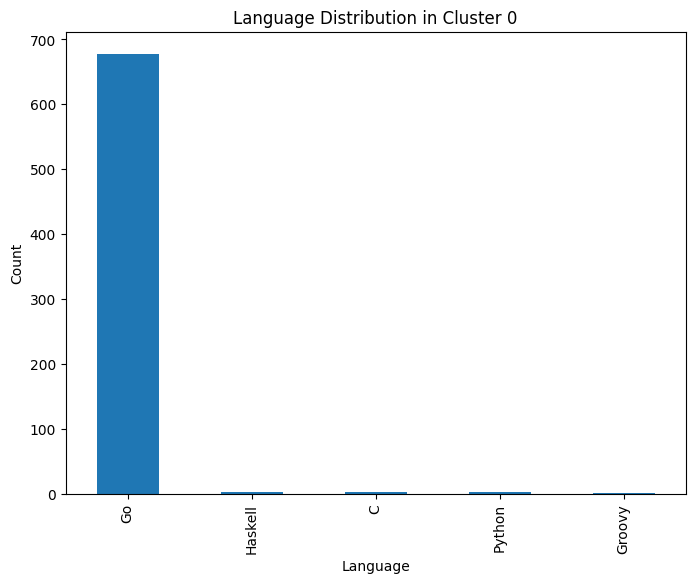

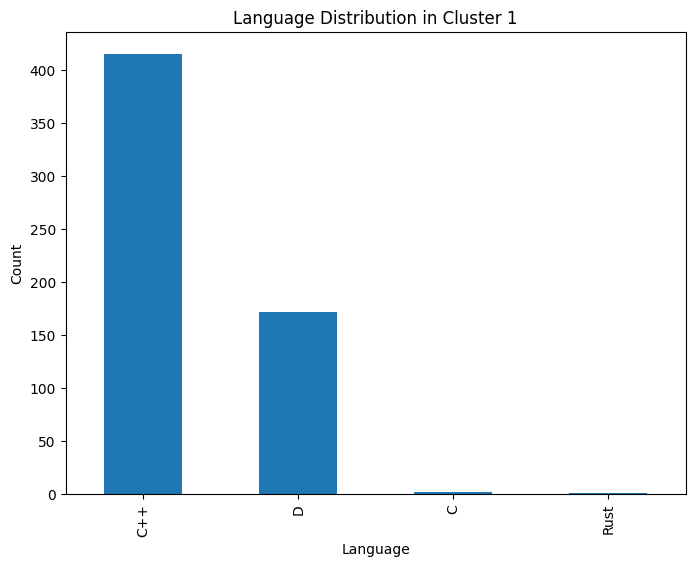

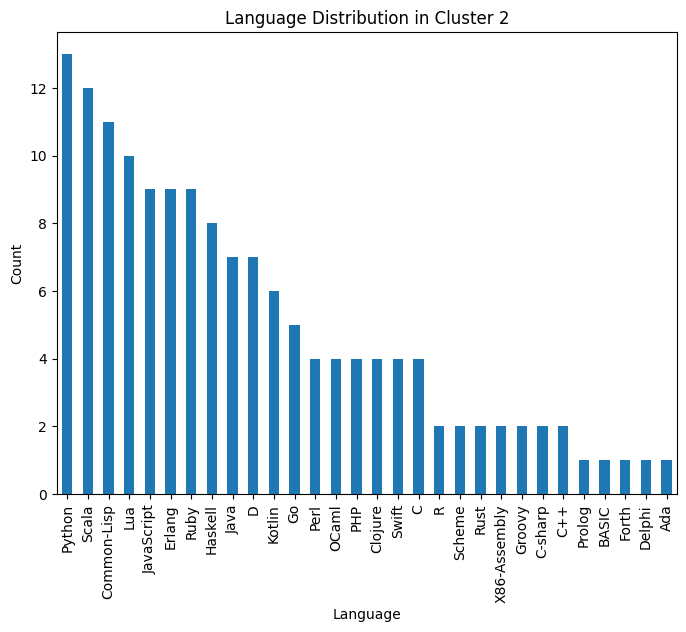

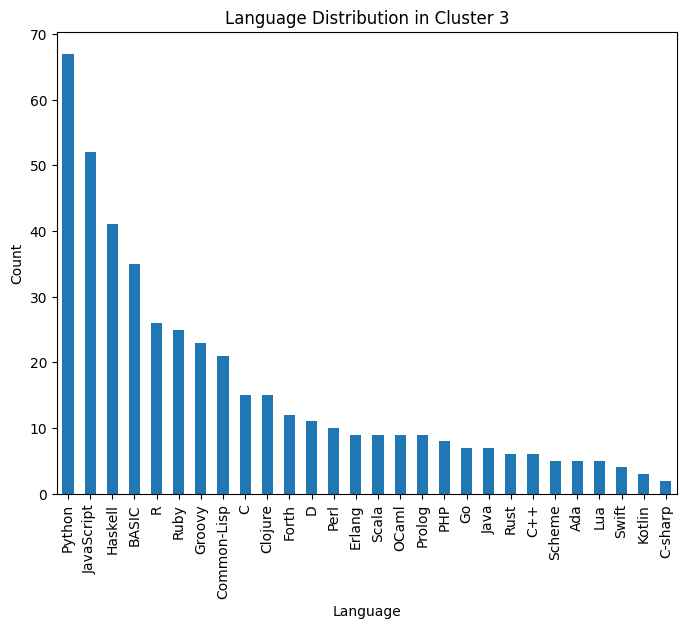

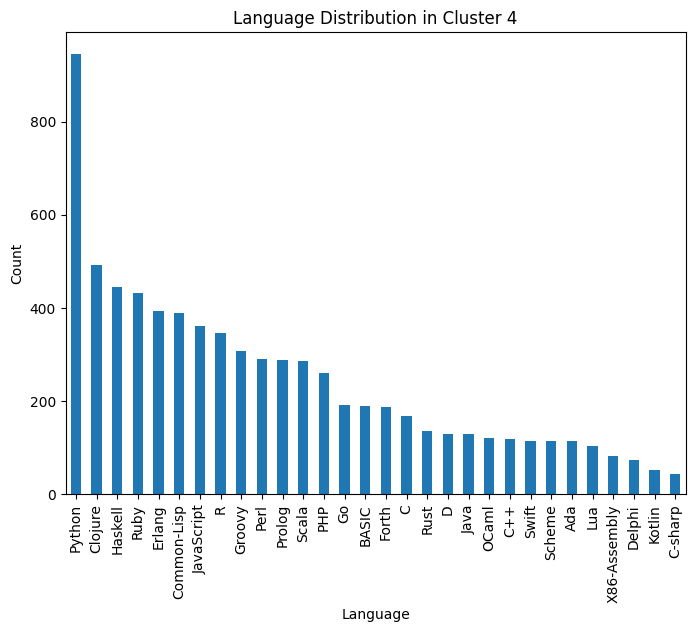

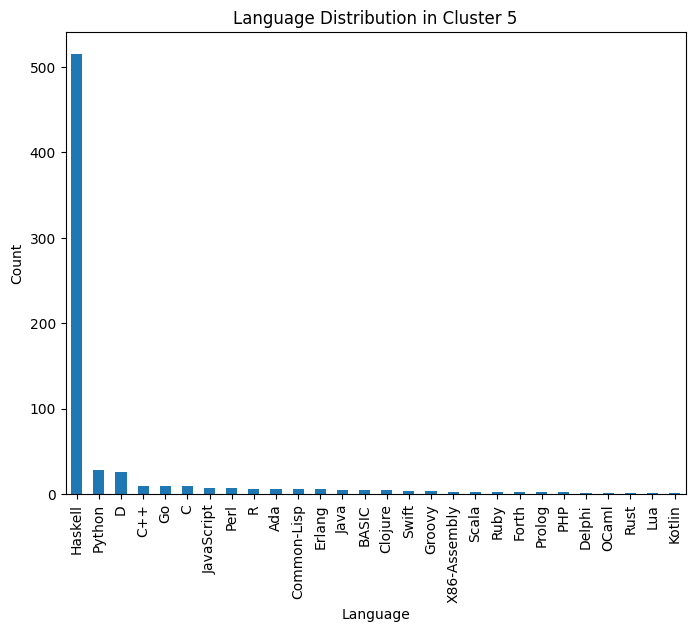

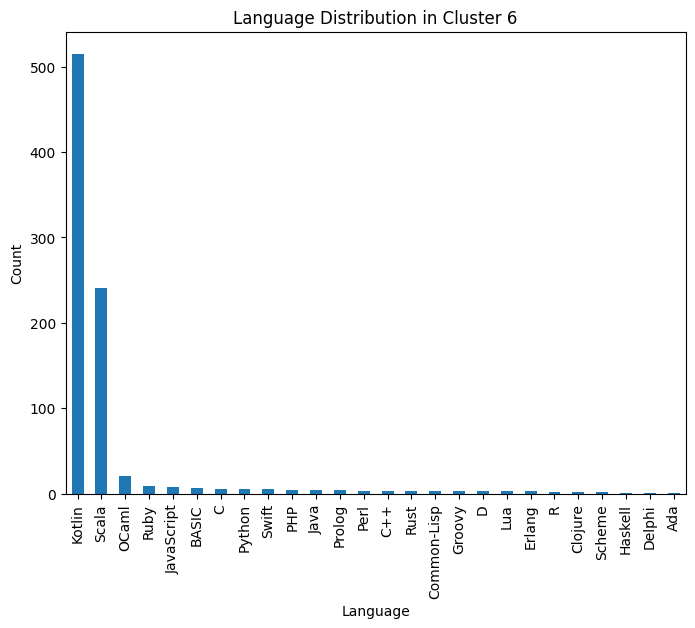

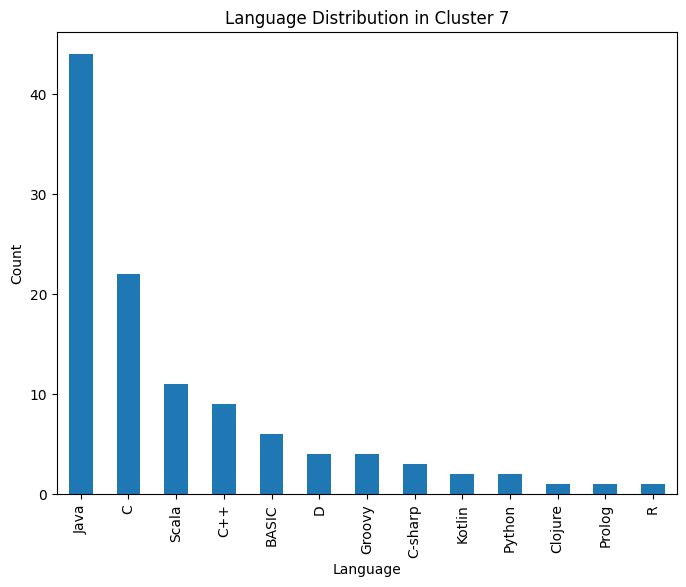

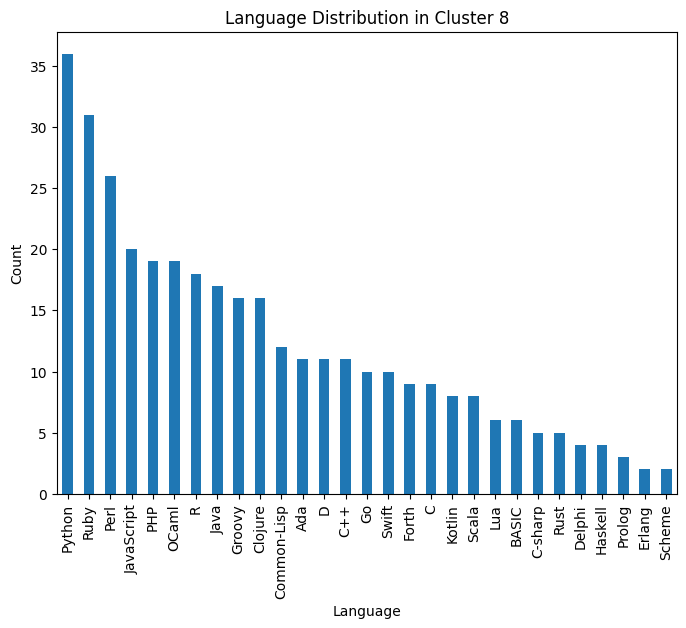

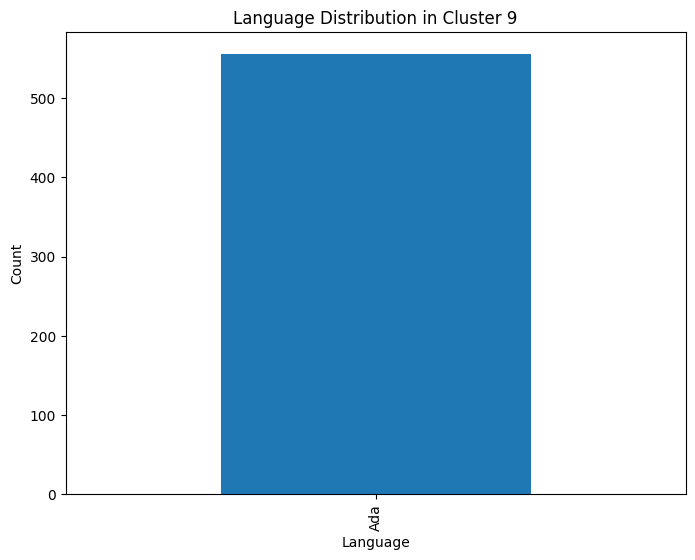

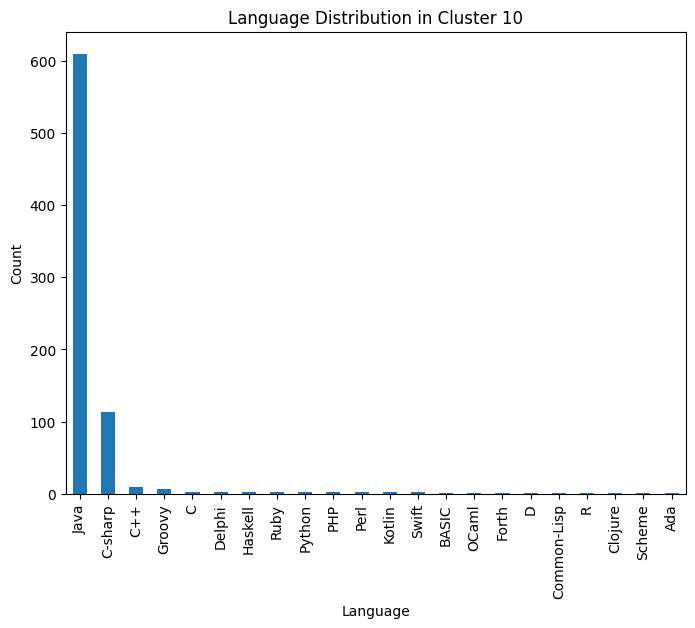

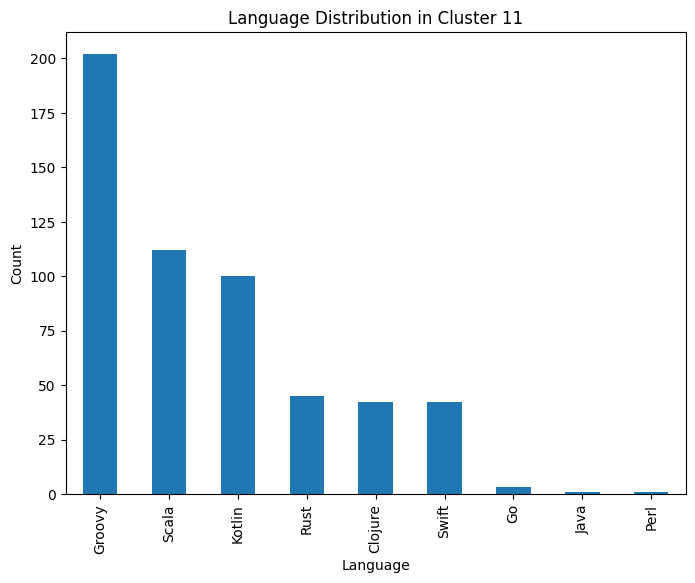

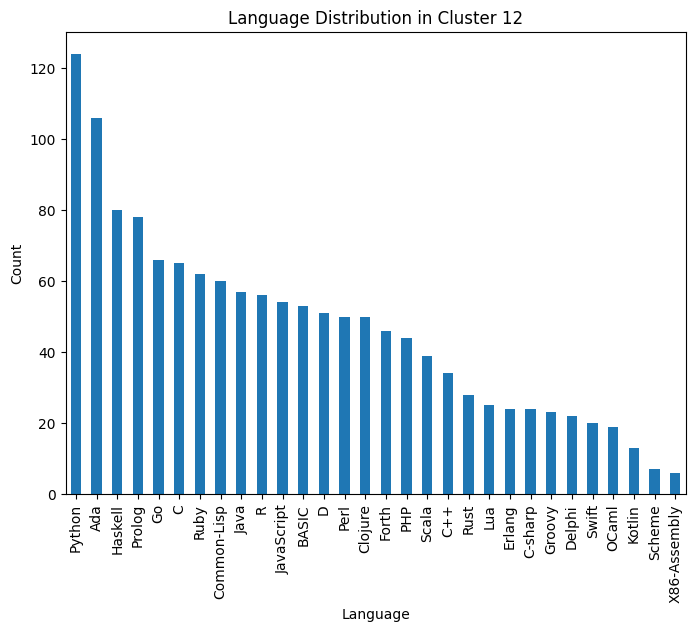

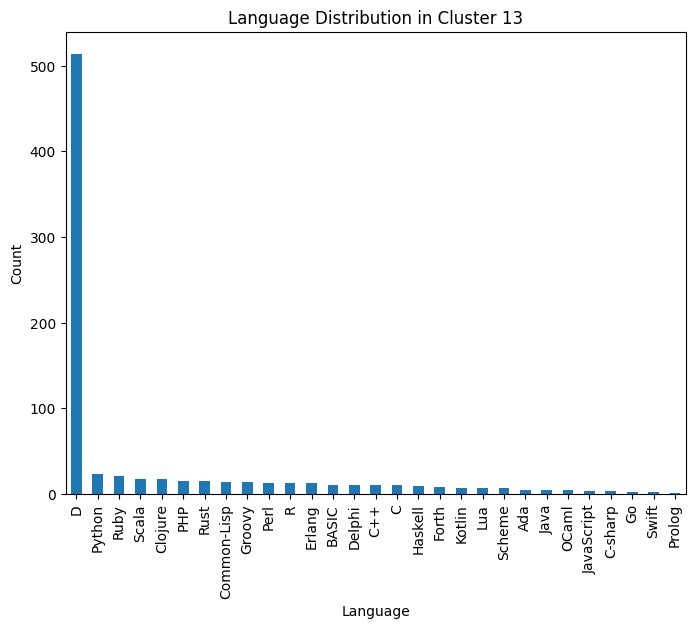

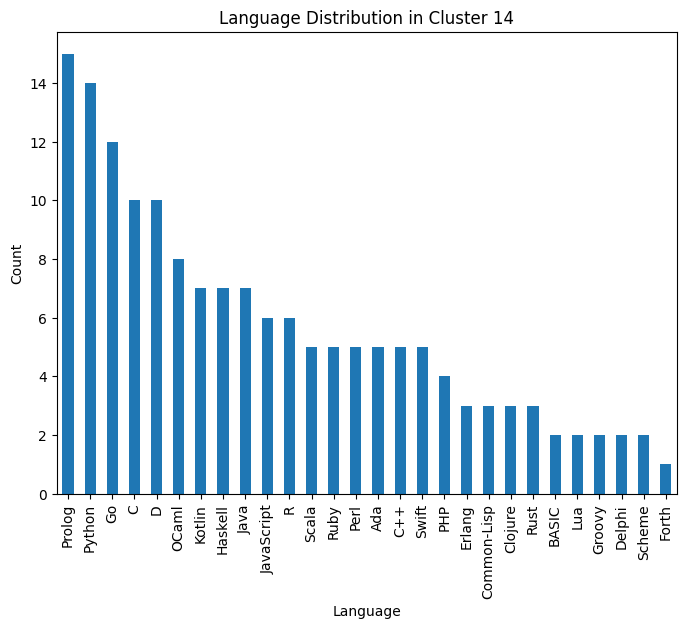

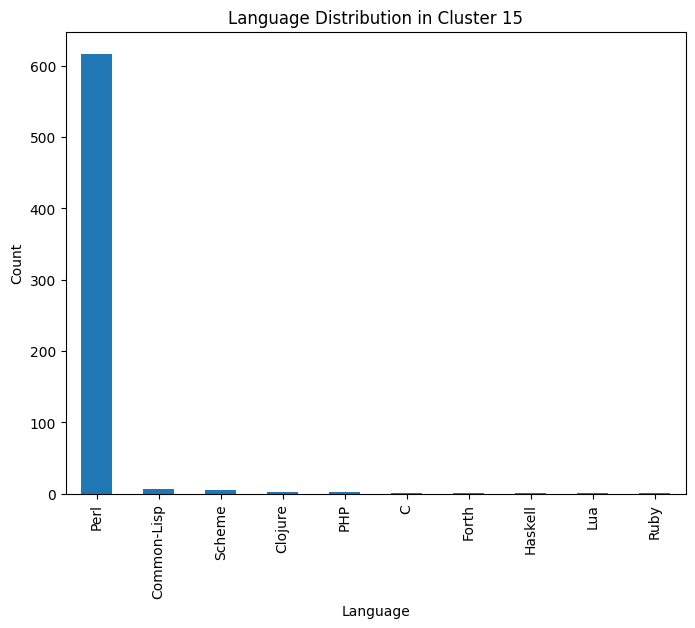

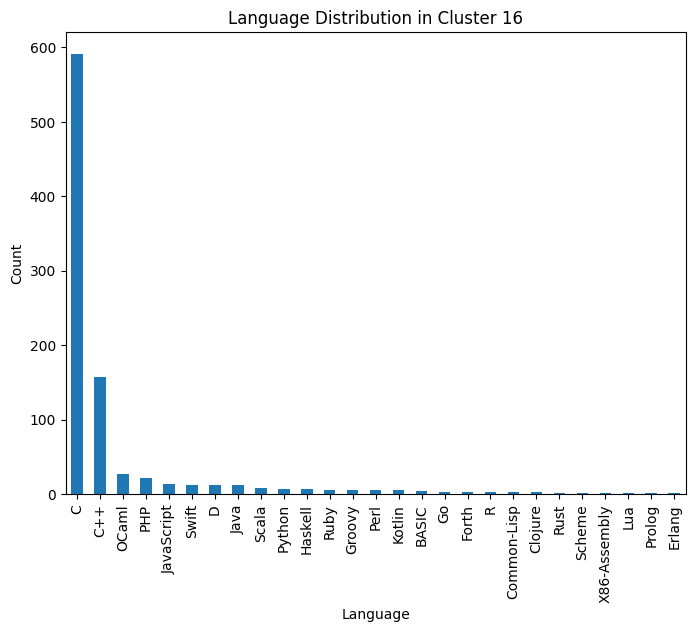

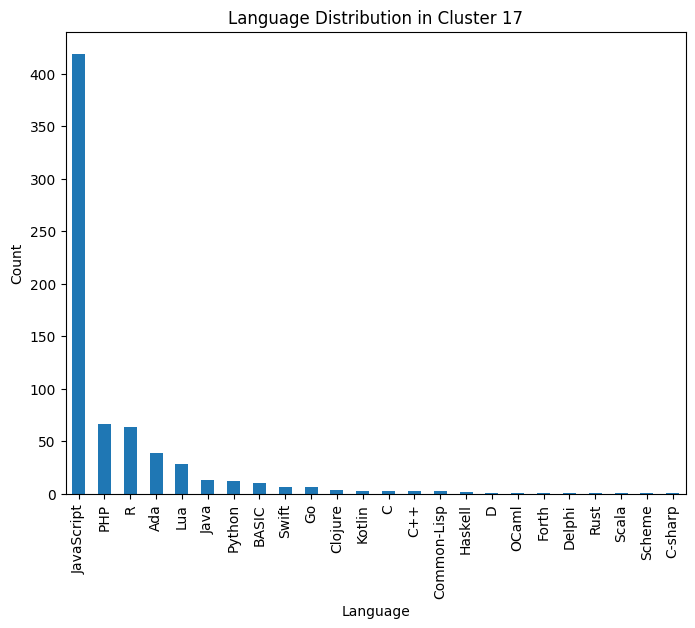

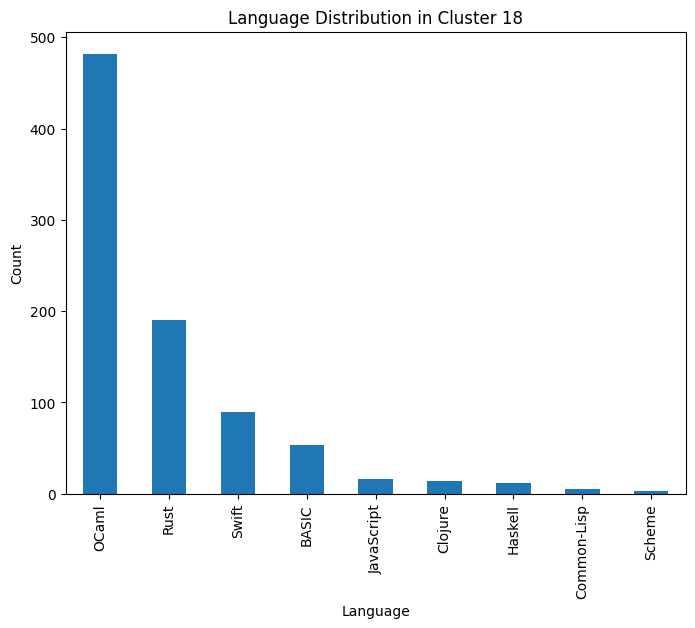

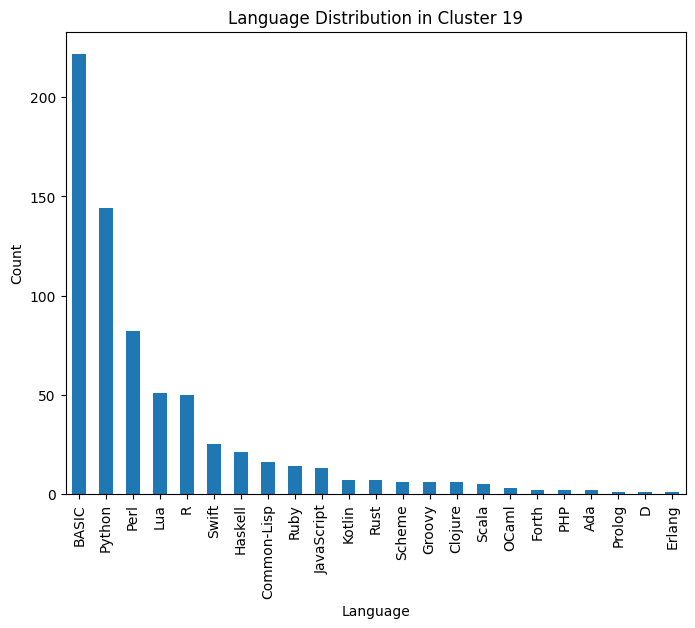

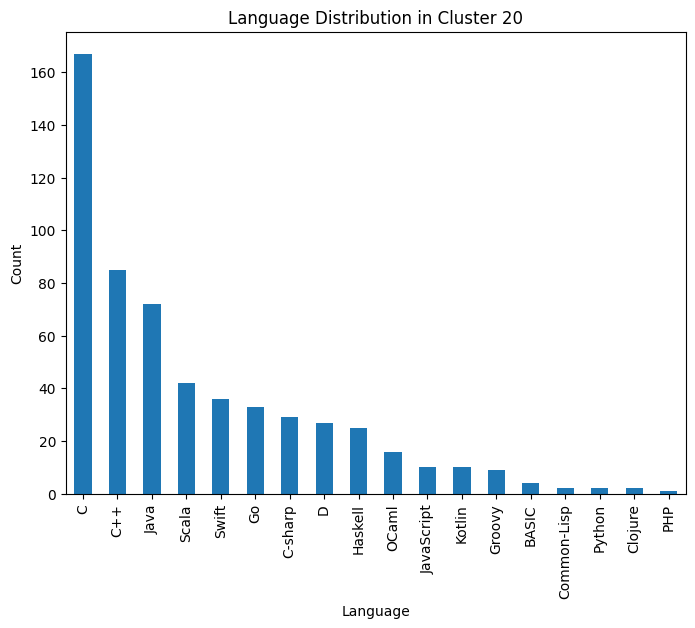

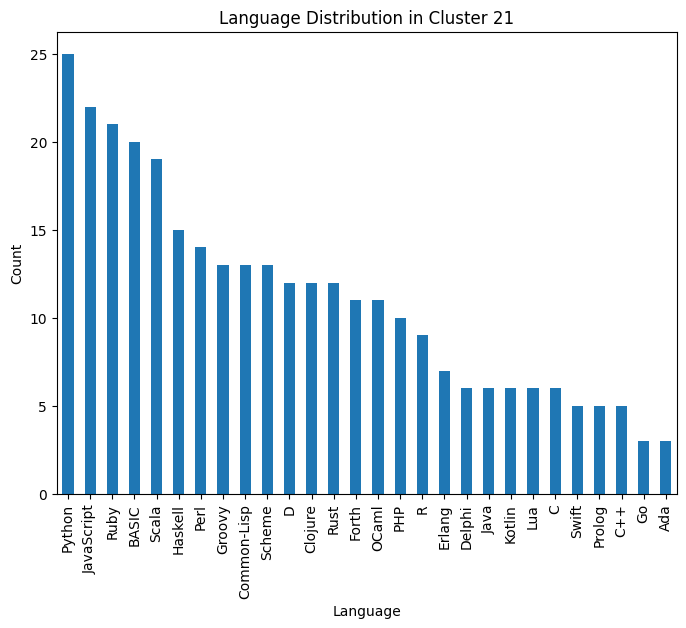

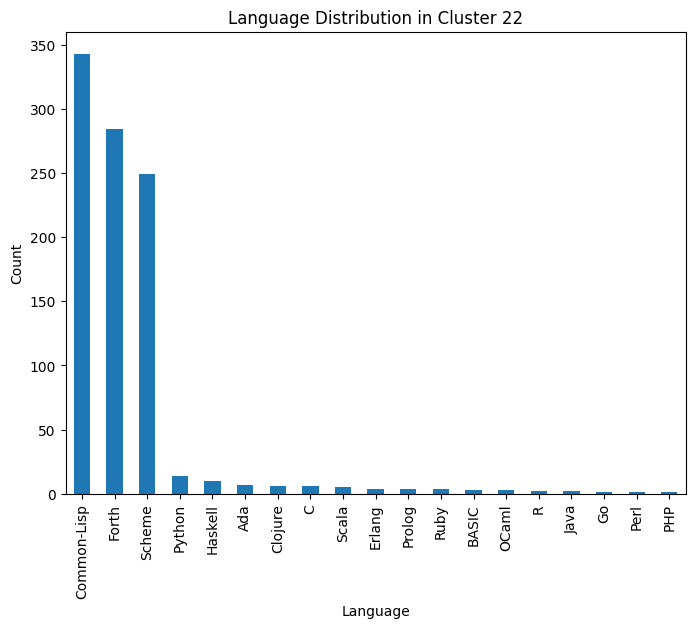

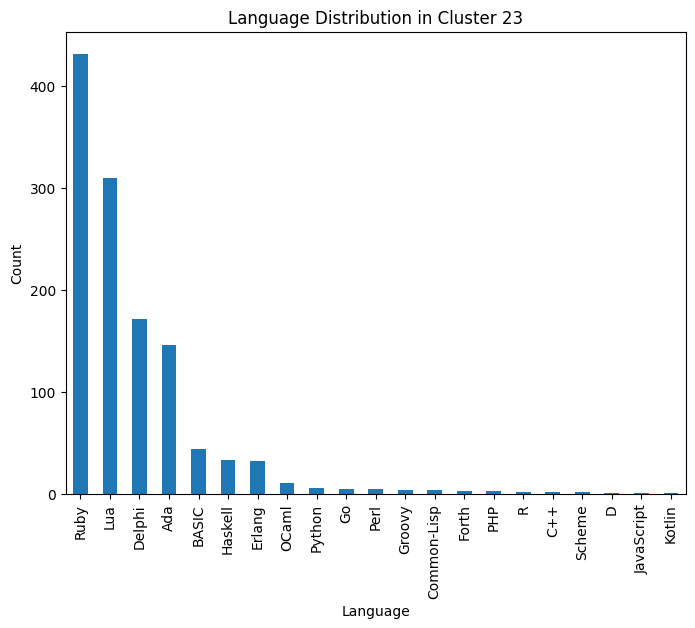

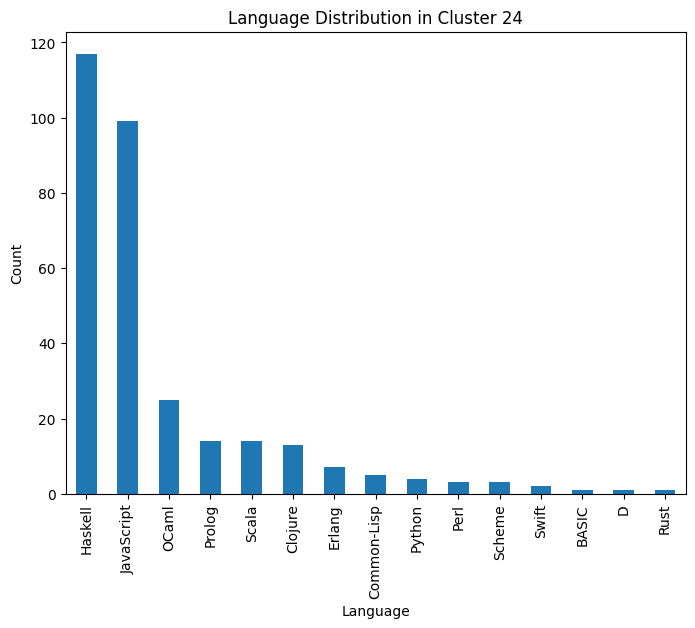

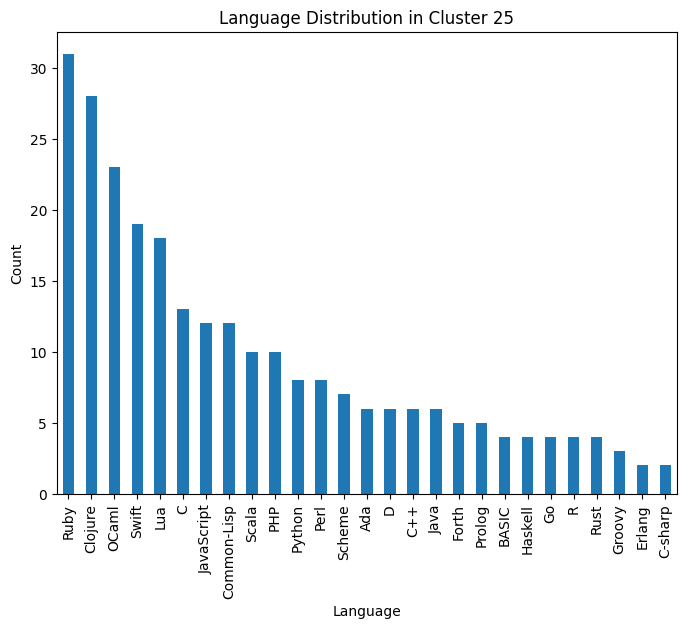

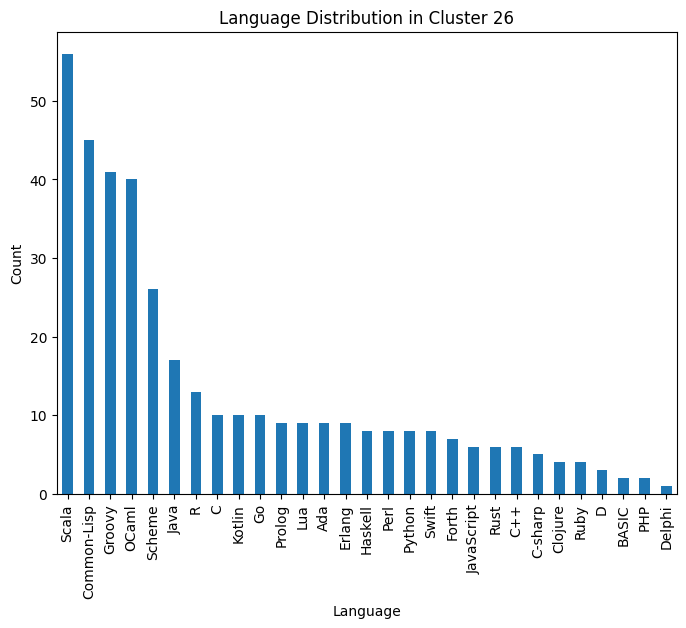

In [7]:
for i in range(optimal_k):
    cluster_indices = np.where(cluster_labels == i)[0]
    cluster_data = data.iloc[cluster_indices]
    language_counts = cluster_data['language'].value_counts()
    plt.figure(figsize=(8, 6))
    language_counts.plot(kind='bar')
    plt.title(f"Language Distribution in Cluster {i}")
    plt.xlabel("Language")
    plt.ylabel("Count")
    plt.show()

Распределение языков программирования по кластерам

In [8]:

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(feature)
centroids = kmeans.cluster_centers_
feature_names = tfidf_vectorizer.get_feature_names_out()
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}:")
    top_features = centroid.argsort()[-5:][::-1]
    for feature_index in top_features:
        print(f"  {feature_names[feature_index]}: {centroid[feature_index]}")


Cluster 0:
  fmt: 0.27189631610006026
  func: 0.1599614981983636
  err: 0.09470255603713448
  println: 0.09120029677883282
  main: 0.0839089341167705
Cluster 1:
  std: 0.4135831763221809
  cout: 0.12684440966841157
  include: 0.11159759327964708
  int: 0.09509408980509308
  endl: 0.06183115458629253
Cluster 2:
  year: 0.4431547174053574
  month: 0.18486752278257337
  date: 0.13167382790321158
  day: 0.1256101083222495
  calendar: 0.09550105617256387
Cluster 3:
  10: 0.1858670583299362
  11: 0.07022643155638675
  15: 0.06645753196372726
  20: 0.06345648070585551
  14: 0.05974192277400295
Cluster 4:
  def: 0.02272338112049954
  if: 0.01748205247829356
  for: 0.015410733080670525
  in: 0.014221643392336381
  string: 0.012846557121880414
Cluster 5:
  data: 0.14683645104918722
  import: 0.09921410710995783
  main: 0.069254689257966
  putstrln: 0.0647902302062433
  show: 0.05291344271228615
Cluster 6:
  val: 0.27057435382896194
  fun: 0.08921735924651551
  println: 0.07267213028225443
  arra


**Результаты кластеризации показывают несколько важных закономерностей:**

**Разнообразие стиля кода:** Присутствие отдельных кластеров для функционального, ООП и скриптового стилей указывает на то, что кодбейс использует несколько парадигм программирования.

**Фокус на алгоритмах:** Большое количество кластеров, связанных с структурами данных и алгоритмами, предполагает, что проект, вероятно, сильно фокусируется на реализации эффективных алгоритмов или структур данных.

**Специализированные компоненты: **Существование специализированных областей (например, кластер 14) указывает на то, что кодбейс может включать модули или библиотеки, специализированные для определенных задач.

**Простые программы:** Некоторые кластеры (например, 21) содержат очень базовые программы, что может указывать на тестовые случаи или простые примерные программы.

Этот анализ предоставляет представление о природе и разнообразии кода, представленного этими кластерами, помогая понять их структуру.

**Анализ кластеров**

**Род кластеров:**
*   Кластеры были сформированы на основе TF-IDF векторов содержимого файлов.
*   Разбиение на кластеры проведено с помощью алгоритма KMeans
*   Оптимальное количество кластеров определено с помощью метода силуэта.
*   Визуализация кластеров осуществлена с помощью PCA для уменьшения размерности данных до 2-х измерений.

**Распределение языков программирования в кластерах:**


*    Для каждого кластера были выведены 5 самых частотных слов/n-грамм.
*    Были построены гистограммы распределения языков программирования в каждом кластере.

**Зависимости:**


*   Была обнаружена корреляция между языком программирования и набором слов в файле.
*   Можно предположить, что кластеры разделяют файлы по используемому языку программирования или по типу кода.


**Дополнительная информация:**


*   Для оценки качества кластеризации были использованы следующие метрики: Коэффициент силуэта ; Индекс Calinski-Harabasz ; Индекс Davies-Bouldin
*   Помимо визуализации в 2D пространстве, была представлена статистика для каждого кластера (среднее, медиана, мин, макс, стандартное отклонение).
*   Кроме того, был проведен анализ распределения языков и расширений файлов в каждом кластере.

Анализ показывает, что кластеризация методом K-средних с n кластерами обеспечивает хорошее разделение данных на отдельные группы, при этом каждый кластер выглядит относительно неплохо.

Кластеризация показала эффективность в выявлении основных групп в данных. Алгоритм K-средних успешно разделил данные на хорошо разграниченные кластеры, каждый из которых содержит похожие объекты. Выбор оптимального количества кластеров основан на максимальном значении коэффициента силуэта и подтверждается анализом индекса Калиньского-Харабаца и индекса Дэвиса-Болдина.

Визуализация с помощью метода главных компонент показала чёткое разделение кластеров в двумерном пространстве, что подтверждает эффективность метода K-средних.


In [9]:
# Ради интереса, тут мы кое-что потрогаем

from sklearn.feature_extraction.text import CountVectorizer

data = pd.read_csv('rd.csv')
columns_to_remove = ['Unnamed: 0']
data = data.drop(columns=columns_to_remove)
data['file_content'] = data['file_content'].fillna('')
df = data.copy()

df['file_content'] = df['file_content'].fillna('')
feature = df.drop('language', axis=1)
target = df['language']

columns_to_remove = ['file_name', 'file_extension']
feature = df.drop(columns=columns_to_remove)

count_vectorizer = CountVectorizer(max_features=5000)
feature = count_vectorizer.fit_transform(feature['file_content'])

silhouette_scores = []
calinski_harabasz = []
davies_bouldin = []
K = range(20, 31, 1)
dense_feature = feature.toarray()
for k in K:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(feature)

    silhouette_avg = silhouette_score(feature, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    calinski_harabasz_avg = calinski_harabasz_score(dense_feature, cluster_labels)
    calinski_harabasz.append(calinski_harabasz_avg)

    davies_bouldin_avg = davies_bouldin_score(dense_feature, cluster_labels)
    davies_bouldin.append(davies_bouldin_avg)

    print(f"Количество кластеров: {k}")
    print(f"Средний коэффициент силуэта: {silhouette_avg:.4f}")

Количество кластеров: 20
Средний коэффициент силуэта: 0.2508
Количество кластеров: 21
Средний коэффициент силуэта: 0.3348
Количество кластеров: 22
Средний коэффициент силуэта: 0.2222
Количество кластеров: 23
Средний коэффициент силуэта: 0.2642
Количество кластеров: 24
Средний коэффициент силуэта: 0.2827
Количество кластеров: 25
Средний коэффициент силуэта: 0.2788
Количество кластеров: 26
Средний коэффициент силуэта: 0.2959
Количество кластеров: 27
Средний коэффициент силуэта: 0.2727
Количество кластеров: 28
Средний коэффициент силуэта: 0.2721
Количество кластеров: 29
Средний коэффициент силуэта: 0.1935
Количество кластеров: 30
Средний коэффициент силуэта: 0.2703


Каким-то магическим образом, BoW оказался намного лучше чем tfidf, это вообще возможно? Разве tfidf не модифицированная версия BOW?